# ECE:5450 Scikit-Learn Tutorial

# Code Preface

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# scikit-learn: Machine Learning in Python

<img src="https://drive.google.com/uc?id=19uME3dIsvBDOtVg5eDeIN7tmLLiRpjwx" width=300>


Scikit Learn (sklearn for short) is a machine learning library in Python that provides access to many common [ML algorithms](https://scikit-learn.org/stable/index.html). You've already seen supervised and unsupervised ML algorithms. So in this lecture, we'll focus on the basics of the sklearn APIs.  "scikit" refers to "scipy toolkit". 

The six main categories of scikit-learn algorithms are:
* Regression
* Classification
* Clustering
* Dimensionality reduction
* Model selection
* Preprocessing

Data (features and targets) is passed into sklearn algorithms typically as Pandas dataframes or numpy arrays or even python lists. 


We'll start by talking about the Estimator API


## Estimators

In scikit-learn, a machine learning model is called as **Estimator**.

Each **Estimator** is a Python `class` and has a form like this:

```python
class estimator():
    def __init__(self, data):
        self.data = data
    def fit():
        # do some calculations with self.data
```

Most commonly, the steps in using the Scikit-Learn Estimator API are as follows:

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector.
4. Fit the model to your data by calling the ``fit()`` method of the model instance.
5. Apply the Model to new data:
   - For supervised learning, often we predict labels for unknown data using the ``predict()`` method.
   - For unsupervised learning, we often transform or infer properties of the data using the ``transform()`` or ``predict()`` method.




So if you want to estimate coefficients or learn patterns within data, simply do the following:

1. initialize an estimator.
2. Fit the estimator with data of your interest.

We'll walk through some very common ML algorithms, starting with regression.

## Regression : Linear Regression - Ordinary Least Squares (OLS)

You should all be familiar with the concept of regression. For Ordinary Least Squares regression, a model is written as:

$\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + ... + w_p x_p$

where $\hat{y}$ is the target and $x_i$ are a set of features. Learning the model is all about finding a set of weights $w_i$ that minimizes: 

$\sum{(y-Xw)^2}$

To accomplish this in sklearn, we'll start by importing `linear_model` and initializing it:

In [2]:
# initialize a linear model estimator
from sklearn import linear_model
lm = linear_model.LinearRegression()

`LinearRegression` accepts two inputs X and Y.

Their formats should be organized as below.

X = $[[x_{11}, x_{12}], [x_{21}, x_{22}], [x_{31},x_{32}]]$

y = $[y_{1}, y_{2}, y_{3}]$

In case that $x_i$ has only one value, let $X = [[x_{11}], [x_{21}], [x_{31}]]$.

So, if you want to estimate a linear model for the data $X=[1,2,3,4,5]$ and $y=[0,2,4,1,4]$, you should change the format of X as $[[1], [2], [3], [4], [5]]$. 

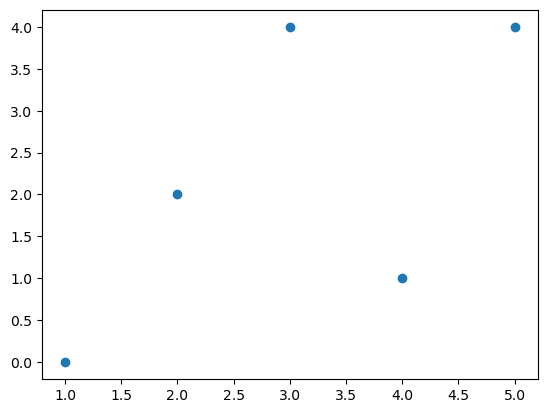

In [3]:
X = [[1], [2], [3], [4], [5]]
y = [0,2,4,1,4]
plt.scatter(X, y);

Now fit the estimator `lm`.

In [4]:
lm.fit(X, y)

LinearRegression()

Estimated intercept $w_0$ and coefficients $w_i$ are stored in `lm.intercept_` and `lm.coef_` respectively.

In [5]:
print(f'Estimated intercept is {lm.intercept_} and estimated coefficient is {lm.coef_[0]}')

Estimated intercept is 0.09999999999999964 and estimated coefficient is 0.7000000000000002


The estimated linear model is $Y = 0.1 + 0.7X$.

Once we have fitr the model we'll use the model's `predict()` method to get a prediction for new data.

For example, if you want to predict a value for $x=10$? &rarr; we can use `lm.predict()`

In [6]:
lm.predict([[10]]) # be sure that X should be given as two dimensional array

array([7.1])

Lastly, we can use `lm.predict()`, to draw the estimated based on the training data:

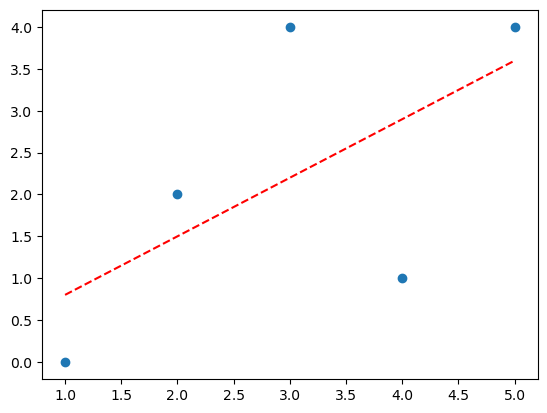

In [7]:
y_pred = lm.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red', linestyle='--');

Remember the rules of scikit-learn. Initialize and fit.

## Classification : Support Vector Machine (SVM)

A Support Vector Machine (SVM) is a supervised learning model that classifies data points into a set of given classes or labels.

SVM finds "hyperplanes" (think of the higher dimensional extension of a line dividing two regions of space in two dimension) that maximally divide labels and uses the hyperplanes as classifiers. 

* For $p$ dimensional vectors, its hyperplane of $(p-1)$ dimensions can separate the vectors into labels.
* For example, if each observation has two values, a hyperplane that divides observations is a line (1-dim).
* If each observation has three values, a hyperplane is a plane (2-dim).

A hyperplane that divides data points can be expressed as $\overrightarrow{w}$ that satisfies $\overrightarrow{w}\overrightarrow{x}-b = c$ where $c$ is a value between two labels.

### Example

To illustrate this, we'll create an artificial dataset by randomly generating samples from two multivariate normal distributions. The "class" or "label" in this case is the distribution from which it is drawn (in this example, there are two different distributions that we draw points from, so there are two classes).

In [8]:
np.random.seed(1) # set the seed, so we all get the same random draws and therefore have the same data.
dat1 = np.random.multivariate_normal(mean=[1,1], cov=[[0.3, 0], [0, 0.3]], size=50)
dat2 = np.random.multivariate_normal(mean=[2,1.5], cov=[[0.3, 0], [0, 0.3]], size=50)

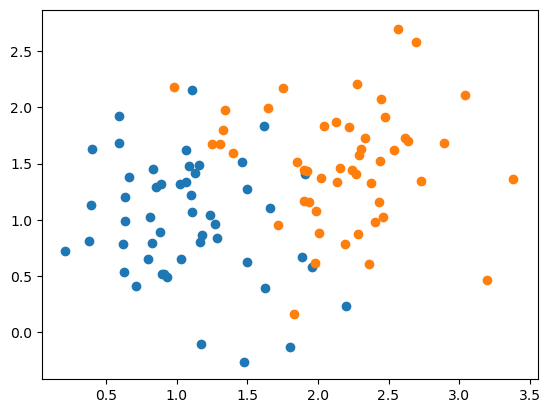

In [9]:
# Visualize the datapoints drawn from these two distributions
plt.scatter(dat1[:,0], dat1[:,1]);
plt.scatter(dat2[:,0], dat2[:,1]);

To proceed, we simply follow the steps, starting with:

1. Initialize an estimator

In [10]:
from sklearn import svm
clf = svm.LinearSVC() # There are different types of SVMs, here we'll use a Linear support vector machine

2. Fit the estimator to the data.

In [11]:
X = np.concatenate((dat1, dat2))
y = [0]*50 + [1]*50 # This is just a quick way to make the labels by repeating the elements of two lists and concatenating them together. 
clf.fit(X, y)

LinearSVC()

To see what the model arrived at for the fit, we can print the coefficients:

In [12]:
print(clf.intercept_, clf.coef_)

[-2.87223291] [[1.29528956 0.66615667]]


Thus, the learned classifier is $-2.87 + 1.30x_{1}+0.67x_{2}$.

And we can make predictions using this model for new data:

In [13]:
X_pred = np.array([[0.5, 0], [1.5, 3], [3, 2]])
y_pred = clf.predict(X_pred)

#### Check the results on a plot

Let's visualise the results:

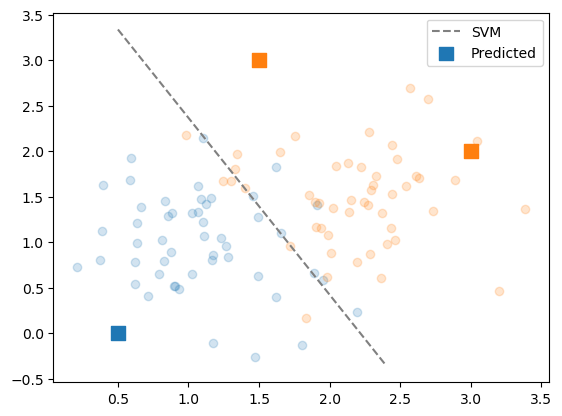

In [14]:
plt.scatter(dat1[:,0], dat1[:,1], alpha=0.2);
plt.scatter(dat2[:,0], dat2[:,1], alpha=0.2);

X_tmp = np.arange(0.5, 2.5, 0.1) # generate tickpoints along the x axis, so we can use them to draw the estimated line
SVM_line = 1/clf.coef_[0][1]*(-clf.intercept_[0] - clf.coef_[0][0]*X_tmp) # get the dividing line
plt.plot(X_tmp, SVM_line, color='gray', linestyle='--', label='SVM');


plt.scatter(X_pred[:,0], X_pred[:,1], marker='s', s=100, 
            color = ['tab:blue' if pred==0 else 'tab:orange' for pred in y_pred], label='Predicted'); # plot the predicted data for our three new datapoints

plt.legend();

### Example: Let's build a SVM classifier that predicts who survived the Titanic

We'll start by looking at some data on who survived the titanic. The full dataset is included as part of the `seaborn` package, but we'll use a version that I've reduced and cleaned up a bit:

We'll build a model using the pclass (passenger class), sex, age, and fare (the fair they paid) to try to predict survived (whether the passenger survived).

First, we'll initiate an SVM model. Unlike the previous example, we'll use the SVC type that provides some advanced kernels. I won't talk about these in detail, though you can read about SVM kernels [here](https://data-flair.training/blogs/svm-kernel-functions/), except to say that nonlinear kernels permit finding divisions in the data beyond a simple line dividing the space.

In [15]:
from sklearn import svm
clf = svm.SVC(gamma='auto', random_state=0) # SVC covers not only linear kernel as LinearSVC but also nonlinear kernels
clf.fit(X, y)

SVC(gamma='auto', random_state=0)

In order to evaluate an ML model, there are a variety of metrics that you should already be aware of (e.g., accuracy, precision, recall, F-score, etc.). We'll use accuracy, which we can import from `sklearn.metrics`. 

In [16]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X)
print('{:.2%}\n'.format(accuracy_score(y, y_pred)))

88.00%



So you might think this model performs pretty well. However, this is not a good assessment of the model, because we assessed performance on the training data. 

## Model selection : How to improve and evaluate the learned model?

Up until this point, we used the entire data to learn the model. However, you know that this is not the correct approach. We need to holdout some data in order to evaluate the model that we learned on "unseen data".

A typical step after loading data is to split it into train, validation, and test sets:

* Train set: a subset of data to train a model
* Validation set: a subset of data to evaluate the model
* Test set: a subset of data to evaluate the learned model

As our current goal is not to evaluate and build a model for better performance we'll just split the data into a 70\% training set and 30\% as test set.  

Fortunately, `sklearn` provides an easy way to split data into train and test sets, using `train_test_split()`:

In [17]:
from sklearn.model_selection import train_test_split
# Let 30% of the data to be a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

Now we'll learn an SVM model, using only the training data:

In [18]:
from sklearn import svm
clf = svm.SVC(gamma='auto', random_state=0) # SVC covers not only linear kernel as LinearSVC but also nonlinear kernels
clf.fit(X_train, y_train)

SVC(gamma='auto', random_state=0)

We can then get the predicted labels for the test set using the model's `predict()` method and then test the accuracy (out of sample performance):

In [19]:
y_pred = clf.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
print('{:.2%}\n'.format(accuracy_score(y_test, y_pred)))

80.00%



SO the model performs **okay** (50% accuracy would be achieved with random prediction).

## Clustering : K-means

What if we have data where no labels are given ? 

One class of ML models discovers finds clusters in the data based on patterns. This process is called **unsupervised learning**. K-means clustering is one type of popular unsupervised learning methods.

Here's the basic idea: Assume that data points belong to one of $K$ different clusters. Our task is to find $K$ different centroids (each is the center of the cluster) and assign datapoints to one of these $K$ clusters, such that the  within-cluster variances are minimized.

Let $(x_1, x_2, ..., x_n)$ be observations and $(\mu_1, \mu_2, ..., \mu_m)$ be centroids of points in cluster $i, C_i$.

Then, our task is to minimize:

 $\sum_{i=1}^{m}\sum_{x\in C_{i}}\|x-\mu_i\|^2$.

<font color=red> **We have to specify the number of clusters $K$ at the beginning**</font>

Just as before, we'll start by generating synthetic data by drawing datapoints from different distributions. We'll use the exact same data as in the SVM example.

In [21]:
# The same data that are generated in the SVM example
np.random.seed(1)
dat1 = np.random.multivariate_normal(mean=[1,1], cov=[[0.3, 0], [0, 0.3]], size=50)
dat2 = np.random.multivariate_normal(mean=[2,1.5], cov=[[0.3, 0], [0, 0.3]], size=50)
dat = np.concatenate((dat1, dat2))

Assume that we do not know underlying clusters to which data points belong.

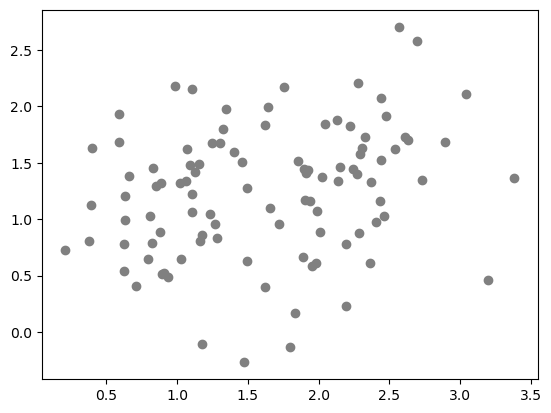

In [22]:
plt.scatter(dat[:,0], dat[:,1], color='gray'); # but it is originally generated by two different distributions

Let's try it out for different values of $K$

### K=2

Set n_clusters=2 in the function KMeans.

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(dat)

KMeans(n_clusters=2, random_state=0)

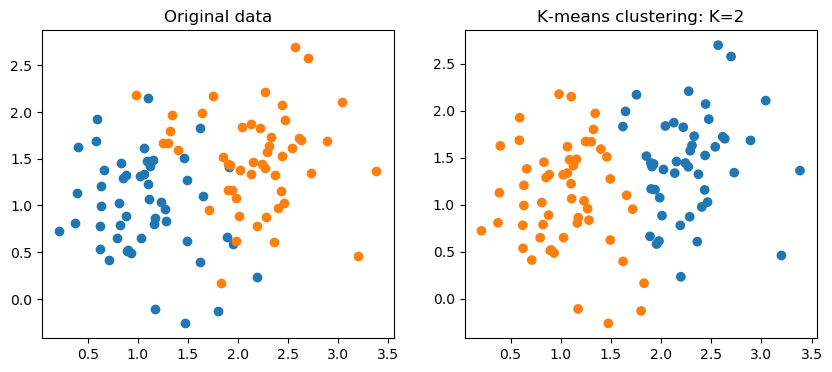

In [24]:
plt.figure(figsize=(10,4));
plt.subplot(1,2,1);
plt.scatter(dat1[:,0], dat1[:,1]);
plt.scatter(dat2[:,0], dat2[:,1]);
plt.title('Original data');

plt.subplot(1,2,2);
labels = kmeans.labels_
plt.scatter(dat[:,0], dat[:,1], color=['tab:orange' if x==0 else 'tab:blue' for x in labels]);
plt.title('K-means clustering: K=2');

You can see that K-means clustering did a fairly good job at detecting the clusters that we created synthetically. Of course, since this is unsupervised learning, we would now the "true" clusters or classes that the data belonged to -- so we can't assess the performance directly.


We would also have no way of knowing whether the data is best characterized by two clusters or more. So let's have a look at other values of $K$

### K=4

In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(dat)

KMeans(n_clusters=4, random_state=0)

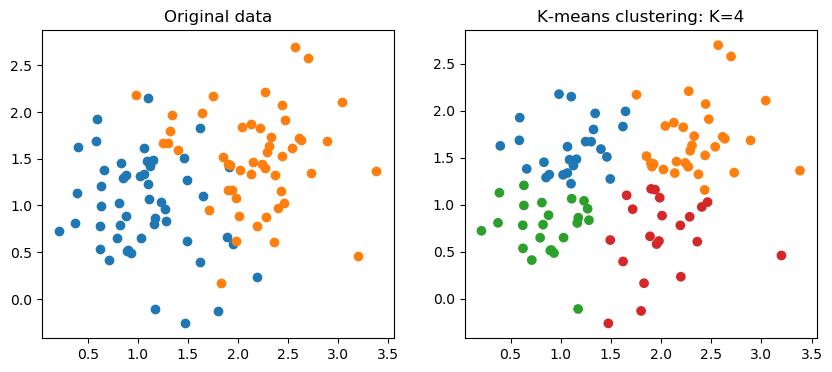

In [26]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(dat1[:,0], dat1[:,1]);
plt.scatter(dat2[:,0], dat2[:,1]);
plt.title('Original data');

plt.subplot(1,2,2);
labels = kmeans.labels_
cmap = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
plt.scatter(dat[:,0], dat[:,1], color=[cmap[x] for x in labels]);
plt.title('K-means clustering: K=4');

The algorithm classifies data points for a given number of clusters, whatever the number is.

### Example: Unsupervised clustering applied to wine data

In this data, chemical compositions and types of wines are given. There are three types of wines (i.e., coming from different winemakers). We will investigate the extent to which k-means clustering can recover the wine types.

Note that there isn't any correlation between the label kmeans ascribes and the true label of the wine (on one run, a particular type of wine might be represented with cluster labeled by 1, but on another the same approximate cluster might be assigned the label 2). Because of this, we'll need a metric that is not dependent on the actual value of the labels. A good metric is the [Mutual Information Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mutual_info_score.html) which is defined by:

 $MI(U,V)=\sum_{i=1}^{|U|} \sum_{j=1}^{|V|} \frac{|U_i\cap V_j|}{N}\log\frac{N|U_i \cap V_j|}{|U_i||V_j|}$

where $|U_i|$ is the number of samples in cluster $U_i$ and $|V_j|$ is the number of samples in cluster $V_j$. We'll use the predicted labels and true labels as $U$ and $V$.

In [27]:
from sklearn.datasets import load_wine
from sklearn.metrics import mutual_info_score
wine = load_wine() 
X = pd.DataFrame(wine.data, columns = wine.feature_names)
y = wine.target # there are three types

In [28]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [30]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_train)

KMeans(n_clusters=3, random_state=0)

In [31]:
y_pred = kmeans.predict(X_test)
print('{:.2%}\n'.format(mutual_info_score(y_test, y_pred)))

50.05%



Not bad, but there is room for improvement. How?

## Preprocessing : Standardization

Often you will encounter data where the features have very different distributions (with very different mean and variance for each column). In such a case, you can benefit from **standardization** -- a process of transforming the features so that each column has zero mean and unit variance. Some ML algorithms will suffer if the data on which they are trained is not standardized. To standardize data, we will use the `sklearn.preprocessing` package.

`StandardScaler` calculates mean and standard devaition of a train set.

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # calculate mean and standard deviation of train set
scaler.fit(X_train)

StandardScaler()

Let's print the means of the different features (columns):

In [33]:
scaler.mean_

array([1.29830645e+01, 2.38370968e+00, 2.36314516e+00, 1.95258065e+01,
       1.00088710e+02, 2.25838710e+00, 1.96951613e+00, 3.64274194e-01,
       1.61250000e+00, 4.99991935e+00, 9.55854839e-01, 2.60193548e+00,
       7.46766129e+02])

`scaler.scale_` returns the standard deviations for each feature:

In [34]:
scaler.scale_

array([7.98101757e-01, 1.13210300e+00, 2.75260483e-01, 3.56510578e+00,
       1.46000509e+01, 5.97773270e-01, 9.73098522e-01, 1.23733411e-01,
       5.95825024e-01, 2.34182051e+00, 2.34596176e-01, 7.19337371e-01,
       3.07610251e+02])

To standardize the data, we simply call `scaler.transform` on the original values to get the transformed data. Transformed data will have 0 mean and 1 variance.

In [35]:
X_train_scaled = scaler.transform(X_train) # You can apply the scaler even to test set

Let's check means of transformed data.

In [36]:
np.mean(X_train_scaled, axis=0)

array([ 2.89016123e-15, -1.25560404e-15,  1.14514133e-15,  2.56246637e-15,
       -3.25904178e-16, -1.35106979e-15,  2.77555756e-16, -1.63936964e-15,
        1.08157211e-15,  3.43811001e-16, -1.82649594e-16,  1.06903733e-15,
        2.28311993e-17])

Compared to means of the original data, those of the standardized data are close to zero. Now, train a k-mean clustering model with the standardized data. 

In [37]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_train_scaled)

KMeans(n_clusters=3, random_state=0)

In [38]:
X_test_scaled = scaler.transform(X_test)
y_pred = kmeans.predict(X_test_scaled)
print('{:.2%}\n'.format(mutual_info_score(y_test, y_pred)))

88.72%



You can see that standardizing the data has a pretty substantial impact on the performance.

### Pipelines : chaining pre-processors and estimators

We can do all procedures (standardize data and learn a model) at once by taking advantage of the `sklearn.pipeline` package!

The below code block shows how to combine the different operations, scaling with the `StandardScaler` and running the `KMeans` algorithm.

In [39]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=3, random_state=0)
)

To execute this pipe, following the rules of sklearn, use `.fit` method.
```python
pipe.fit(X_train, Y_train)
```

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

wine = load_wine() 
X = pd.DataFrame(wine.data, columns = wine.feature_names)
Y = wine.target # there are three types
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

pipe.fit(X_train, Y_train)

X_test_scaled = scaler.transform(X_test)
Y_pred = kmeans.predict(X_test_scaled)
print('{:.2%}\n'.format(mutual_info_score(Y_test, Y_pred)))

88.72%



And of course we get the same result as before.  Making a pipeline is useful as frequently you'll want to do several transformations of your data as part of model fitting.

## Dimensionality reduction

Dimensionality reduction offers several advantages. (https://en.wikipedia.org/wiki/Dimensionality_reduction)
* It reduces the time and storage space required.
* Removes  multi-collinearity to improve the interpretation of the parameters of the machine learning model.
* It becomes easier to visualize the data when reduced to very low dimensions such as 2D or 3D.
* It avoids the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality).

For example, we can reduce 13 dimensions in the wine data into 2 dimensions. This process helps to understand and visualize complicated data. In this section, we will cover a popular dimensionality reduction method: **principal component analysis (PCA)**.

#### What is PCA?

PCA finds linearly uncorrelated variables by combining existing correlated variables. Let's explore the concept with the wine data. In the wine data, "alcohol" and "color_intensity" are correlated.

In [41]:
from sklearn.datasets import load_wine
wine = load_wine() 
X = pd.DataFrame(wine.data, columns = wine.feature_names)
y = wine.target # there are three types

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
X_train_scaled = scaler.transform(X_train) # You can apply the scaler even to test set

Correlation between alchol and color intensity is 0.55


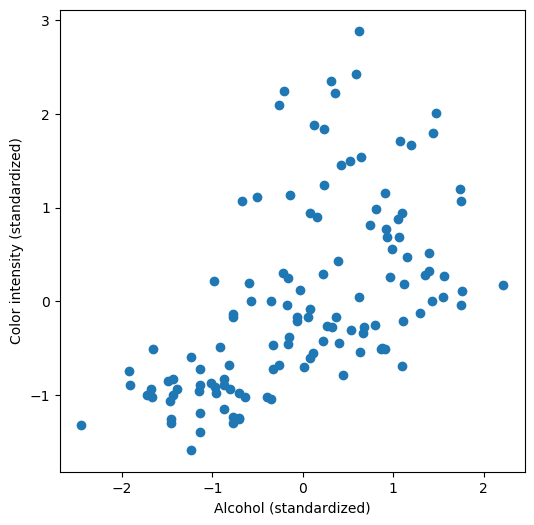

In [42]:
plt.figure(figsize=(6,6))
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,-4])
plt.xlabel("Alcohol (standardized)")
plt.ylabel("Color intensity (standardized)")
print("Correlation between alchol and color intensity is", round(X.alcohol.corr(X.color_intensity), 2))

As the two variables are correlated, significant amount of variances between them can be captured through a new variable. PCA returns this new variable by combining correlated ones. The new variable is represented as the arrow on the below plot.

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0) # 13 dimensions to 2 dimensions
pca.fit(X_train_scaled[:, (0,-4)]) # find principal components

PCA(n_components=2, random_state=0)

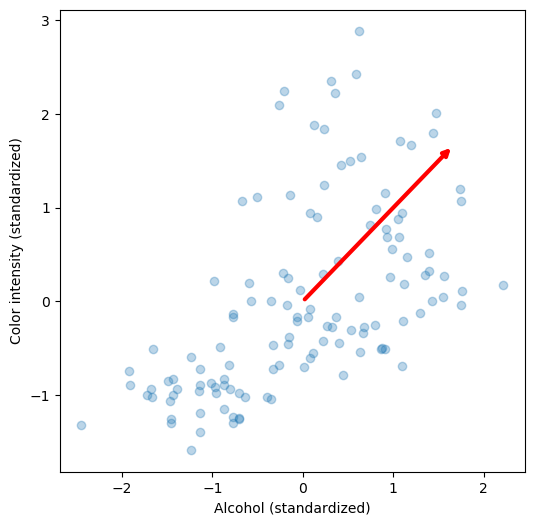

In [44]:
plt.figure(figsize=(6,6));
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,-4], alpha=0.3);
plt.xlabel("Alcohol (standardized)");
plt.ylabel("Color intensity (standardized)");
plt.annotate("", [0,0], -3*pca.explained_variance_ratio_[0]*pca.components_[:,0], 
             arrowprops=dict(arrowstyle='<-', linewidth=3, color='red'));

In this way, PCA finds a given number of components (`n_components`) that are uncorrelated and explain variance well.

"pca.explained_variance_ratio_" summarizes how much variance that a component explains.

In [45]:
pca.explained_variance_ratio_

array([0.78251449, 0.21748551])

This shows that the first principal component (red arrow) explains about 78% of the total variance.

Let's apply PCA for the entire wine data.

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0) # 13 dimensions to 2 dimensions
pca.fit(X_train_scaled) # find principal components

PCA(n_components=2, random_state=0)

In [47]:
pca.explained_variance_ratio_

array([0.37329648, 0.18818926])

About 37\% of the variance is explained by the first principle component and about 19\% of the variance is explained by the second principle component. It means that the first two components capture more than half of all the variance of the data. 

So, projecting the wine data onto the first two principal components can give a good overview of the data.

In [48]:
pca_transformed = pca.transform(X_train_scaled) # project the data onto principal components

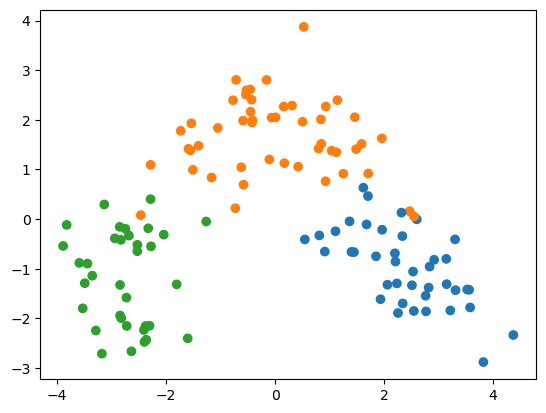

In [49]:
cmap = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
plt.scatter(pca_transformed[:,0], pca_transformed[:,1], color = [cmap[x] for x in y_train]);

Three wine types are separated well by the first two principal components

# A ton of models

Sklearn has a ton of models that you can use. I will not cover these in detail, but you should be familiar with them from your prior coursework. In particular, you should familiarize yourself with:
* K nearest neighbor
* Decision trees
* Naive bayes

You can find more details at: [HERE](https://scikit-learn.org/stable/index.html)
